In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [36]:
# # Define the folders containing training result CSVs
# folders = [
#     "no_dense_layer", "dense_32", "dense_64", "dense_64_32"
# ]
# folders = [
#     "64_128_64_LSTM", "128_64_LSTM"
# ]
# folders = [
#     "no_dense_layer", "dense_32", "dense_64", "dense_64_32", "64_128_64_LSTM", "128_64_LSTM"
# ]


# folders = [
#     "lstm_16_32_16_Adam", "lstm_32_16_Adam"
# ]
# folders = [
#     "lstm_16_32_16_Adam", "lstm_32_16_Adam", "lstm_16_32_16_SGD", "lstm_32_16_SGD"
# ]
# folders = [
#     "lstm_16_32_16_Adam", "lstm_16-32-16_Dense16", "lstm_16-32-16_Dense32", "lstm_16_32_16_dense32_16", "lstm_16_32_16_dense8", "lstm_16_32_16_dense16_8"
# ]
# folders = [
#     "lstm_4_8_4_Adam", "lstm_8_4_Adam", "lstm_16_8_Adam", "lstm_16_32_16_Adam", "lstm_32_16_Adam"
# ]

# folders = ["lstm_16_32_16", "lstm_32_16"]
# folders = ["lstm_32_16", "lstm_32_16_l2_0-05"]
# folders = ["lstm_16_8", "lstm_32_16"]
# folders = ["lstm_16_8", "lstm_16_8_l2_0-05"]
# folders = ["lstm_8_4", "lstm_8_4_l2_0-05", "lstm_4_8_4", "lstm_4_8_4_l2_0-05"]
# folders = ["lstm_8_4", "lstm_4_8_4", "lstm_16_32_16", "lstm_32_16"]
# folders = ["output_64_32_0-00005", "dense_128_64_32", "output_32_16_0-00005", "output_64_32_16_0-00005", "dense_128_64"]
folders = ["dense_128_64", "dense_128_64_32", "output_64_32_0-00005"]
# folders = ["output_32_16", "output_64_32_16", "output_128_64"]

dir = os.getcwd()
print(dir)
file_name = "training_results.csv"
base_output_folder = dir + "/mp_data_normalised/"
base_statistic_output = "final/statistic_final_output"
statistic_file_base = "dense_128_64_n_128_64_32"


/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model


In [37]:
# Dictionary to store data for each model
model_data = {}

# Load data from each folder
for folder in folders:
    file_path = os.path.join(base_output_folder, folder, file_name)
    print(file_path)
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, delimiter=",", header=0)  
            model_data[folder] = df
        except Exception as e:
            print(f"Error reading {file_path}: {e}")


/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/dense_128_64/training_results.csv
/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/dense_128_64_32/training_results.csv
/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/output_64_32_0-00005/training_results.csv


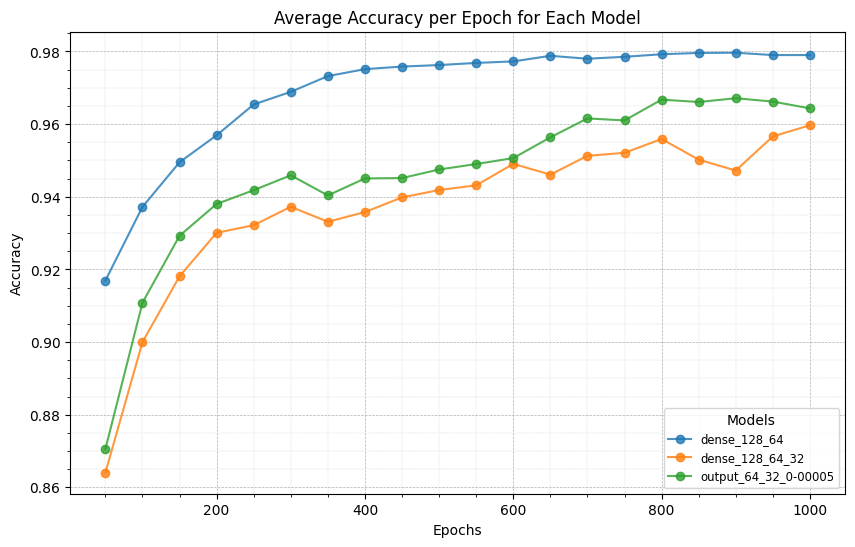

In [38]:
# Plot the average accuracy per epoch for each model without best-fit curves

plt.figure(figsize=(10, 6))
for folder, df in model_data.items():
    if "Epochs" in df.columns and "Accuracy" in df.columns:
        # Group by 'Epochs' to compute the average accuracy per epoch
        grouped = df.groupby("Epochs")["Accuracy"].mean().reset_index()
        epochs = grouped["Epochs"].values
        accuracies = grouped["Accuracy"].values
        
        # Plot the average accuracy as a line plot
        plt.plot(epochs, accuracies, label=f"{folder}", alpha=0.8, linestyle='-', marker='o')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Average Accuracy per Epoch for Each Model")
plt.legend(title="Models", fontsize='small', loc="best")
plt.grid(True)

# Enable minor ticks on both axes
plt.minorticks_on()
plt.grid(which="both", linestyle="--", linewidth=0.5)  # Show both major and minor grid lines
plt.grid(which="minor", linestyle=":", linewidth=0.3)  # Make minor grid lines more subtle

# Save plot path
statistic_file = "Accuracy_" + statistic_file_base
output_path = os.path.join(base_statistic_output, statistic_file + ".png")

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches="tight")

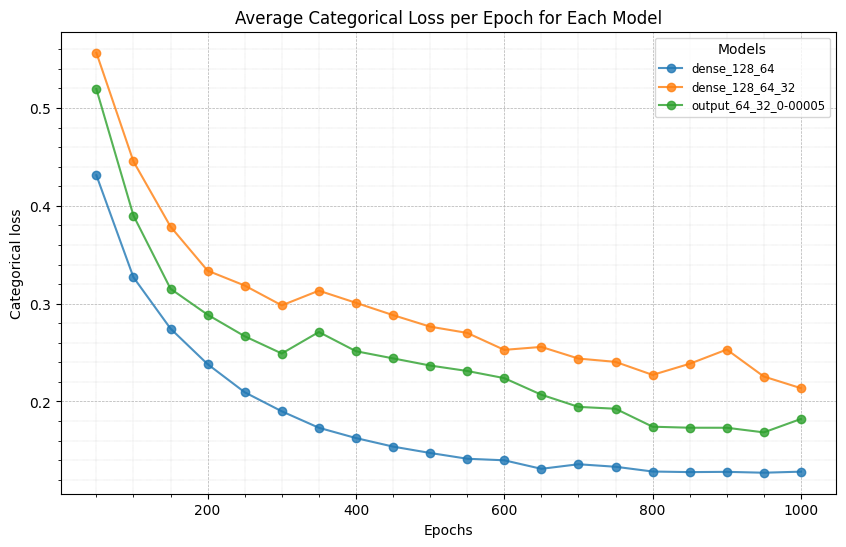

In [39]:
# Plot the average accuracy per epoch for each model without best-fit curves

plt.figure(figsize=(10, 6))

for folder, df in model_data.items():
    if "Epochs" in df.columns and "Loss" in df.columns:
        # Group by 'Epochs' to compute the average accuracy per epoch
        grouped = df.groupby("Epochs")["Loss"].mean().reset_index()
        epochs = grouped["Epochs"].values
        accuracies = grouped["Loss"].values
        
        # Plot the average accuracy as a line plot
        plt.plot(epochs, accuracies, label=f"{folder}", alpha=0.8, linestyle='-', marker='o')

plt.xlabel("Epochs")
plt.ylabel("Categorical loss")
plt.title("Average Categorical Loss per Epoch for Each Model")
plt.legend(title="Models", fontsize='small', loc="best")
plt.grid(True)

# Enable minor ticks on both axes
plt.minorticks_on()
plt.grid(which="both", linestyle="--", linewidth=0.5)  # Show both major and minor grid lines
plt.grid(which="minor", linestyle=":", linewidth=0.3)  # Make minor grid lines more subtle

# Save plot path
statistic_file = "loss_" + statistic_file_base
output_path = os.path.join(base_statistic_output, statistic_file + ".png")

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches="tight")

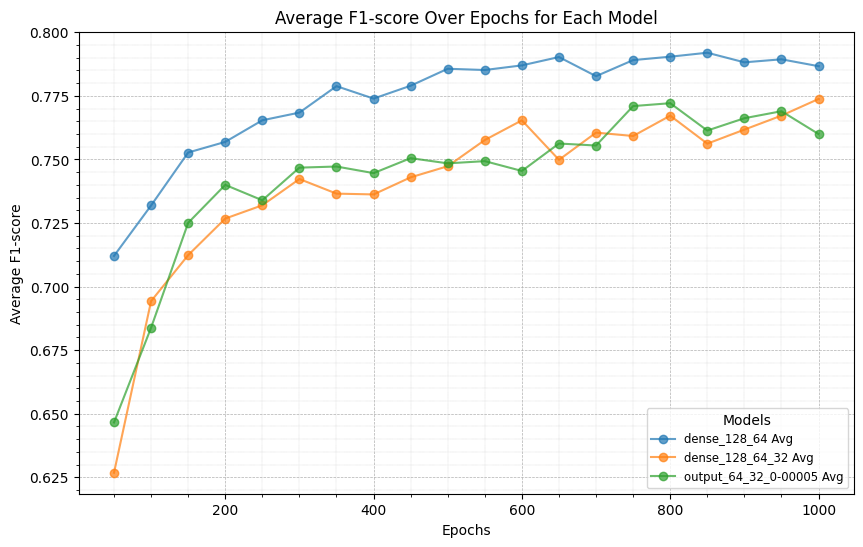

In [40]:
# Dictionary to store epoch-wise F1-score data for averaging per model
f1_scores_per_epoch_per_model = {}

# Process each model to compute average F1-score per epoch
for folder in folders:
    file_path = os.path.join(base_output_folder, folder, file_name)

    if os.path.exists(file_path):
        try:
            # Load CSV
            df_model = pd.read_csv(file_path, delimiter=",")

            # Ensure required columns exist
            if "Epochs" in df_model.columns and "Precision (OOD)" in df_model.columns and "Recall (OOD)" in df_model.columns:
                # Compute F1-score
                precision = df_model["Precision (OOD)"].fillna(0)
                recall = df_model["Recall (OOD)"].fillna(0)
                f1_scores = (2 * precision * recall) / (precision + recall)
                f1_scores = f1_scores.fillna(0)  # Handle divide-by-zero cases

                # Store F1-scores for averaging per epoch
                for epoch, f1 in zip(df_model["Epochs"], f1_scores):
                    if folder not in f1_scores_per_epoch_per_model:
                        f1_scores_per_epoch_per_model[folder] = {}
                    if epoch not in f1_scores_per_epoch_per_model[folder]:
                        f1_scores_per_epoch_per_model[folder][epoch] = []
                    f1_scores_per_epoch_per_model[folder][epoch].append(f1)

        except Exception as e:
            print(f"Error processing {folder} for averaged F1-score calculation: {e}")

# Compute average F1-score per epoch per model
average_f1_per_model = {}

for folder, epoch_data in f1_scores_per_epoch_per_model.items():
    avg_f1_per_epoch = {epoch: sum(f1_values) / len(f1_values) for epoch, f1_values in epoch_data.items()}
    average_f1_per_model[folder] = avg_f1_per_epoch

# Plot the F1-score per model with average trend per epoch
plt.figure(figsize=(10, 6))

for folder, avg_f1_data in average_f1_per_model.items():
    sorted_epochs = sorted(avg_f1_data.keys())
    sorted_avg_f1 = [avg_f1_data[epoch] for epoch in sorted_epochs]
    plt.plot(sorted_epochs, sorted_avg_f1, label=f"{folder} Avg", linestyle="-", marker="o", alpha=0.7)

# Configure plot
plt.xlabel("Epochs")
plt.ylabel("Average F1-score")
plt.title("Average F1-score Over Epochs for Each Model")
plt.legend(title="Models", fontsize="small", loc="best")
plt.grid(True)

# Enable minor ticks on both axes
plt.minorticks_on()
plt.grid(which="both", linestyle="--", linewidth=0.5)  # Show both major and minor grid lines
plt.grid(which="minor", linestyle=":", linewidth=0.3)  # Make minor grid lines more subtle


# Save plot path
statistic_file = "F1_" + statistic_file_base
output_path = os.path.join(base_statistic_output, statistic_file + ".png")

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches="tight")


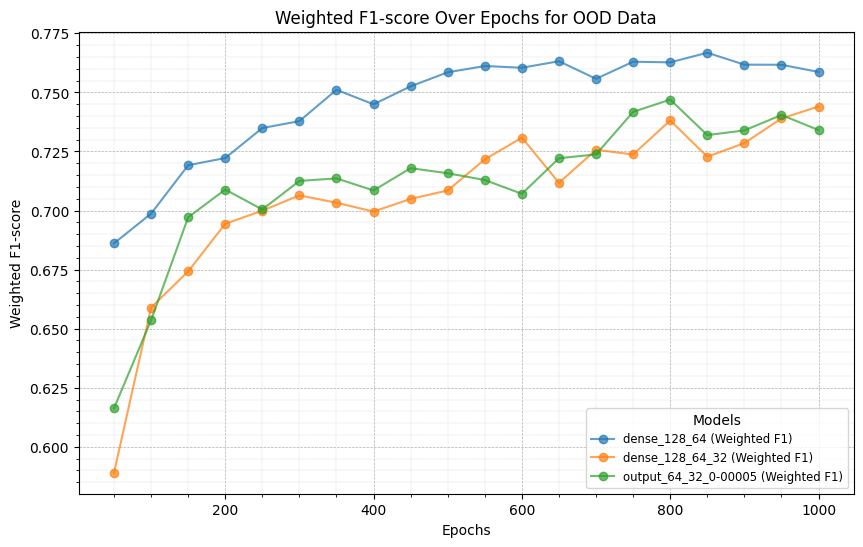

In [41]:
from collections import defaultdict
import numpy as np

# Dictionary to store weighted F1-score per epoch per model
weighted_f1_per_epoch_per_model = defaultdict(lambda: defaultdict(list))

# Process each model's CSV file
for folder in folders:
    file_path = os.path.join(base_output_folder, folder, file_name)
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, delimiter=",")

            # Ensure required columns exist
            if "Epochs" in df.columns and "Classification Report (OOD)" in df.columns:
                # Extract weighted F1-score from classification report
                for epoch, report in zip(df["Epochs"], df["Classification Report (OOD)"]):
                    if isinstance(report, str):
                        try:
                            weighted_f1 = eval(report)["weighted avg"]["f1-score"]
                            weighted_f1_per_epoch_per_model[folder][epoch].append(weighted_f1)
                        except Exception as e:
                            print(f"Error processing epoch {epoch} in {folder}: {e}")

        except Exception as e:
            print(f"Error processing {folder} for weighted F1-score visualization: {e}")

# Compute the mean weighted F1-score for each epoch per model
average_f1_per_model = {}

for folder, epoch_data in weighted_f1_per_epoch_per_model.items():
    avg_f1_per_epoch = {epoch: np.mean(f1_values) for epoch, f1_values in epoch_data.items()}
    average_f1_per_model[folder] = avg_f1_per_epoch

# Plot the weighted F1-score over epochs
plt.figure(figsize=(10, 6))

for folder, avg_f1_data in average_f1_per_model.items():
    sorted_epochs = sorted(avg_f1_data.keys())
    sorted_f1_scores = [avg_f1_data[epoch] for epoch in sorted_epochs]
    plt.plot(sorted_epochs, sorted_f1_scores, label=f"{folder} (Weighted F1)", linestyle="-", marker="o", alpha=0.7)

# Configure plot
plt.xlabel("Epochs")
plt.ylabel("Weighted F1-score")
plt.title("Weighted F1-score Over Epochs for OOD Data")
plt.legend(title="Models", fontsize="small", loc="best")
plt.grid(True)

# Enable minor ticks
plt.minorticks_on()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.grid(which="minor", linestyle=":", linewidth=0.3)

# Save the plot
statistic_file = "Weighted_F1_" + statistic_file_base
output_path = os.path.join(base_statistic_output, statistic_file + ".png")

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches="tight")


In [42]:
# Function to parse and clean confusion matrix strings
import re


def clean_conf_matrix(matrix_str):
    try:
        # Remove newlines and extra spaces
        matrix_str = matrix_str.replace("\n", " ").replace("[", "").replace("]", "")
        
        # Extract numbers using regex
        numbers = list(map(int, re.findall(r'\d+', matrix_str)))
        
        # Determine matrix size (assuming it's square)
        size = int(len(numbers) ** 0.5)
        
        # Reshape into a square matrix
        conf_matrix = np.array(numbers).reshape(size, size)
        
        return conf_matrix
    except Exception as e:
        print(f"Error parsing confusion matrix: {e}")
        return None

## Calculate Macro-F1 Score

In [46]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.layers import LSTM
from concurrent.futures import ThreadPoolExecutor, as_completed
import re  # For regex-based extraction
# Define the model path (Ensure this is correct!)

model_path = "/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/output_64_32/skip_0_testsize_25_0_Adam_epochs300_run1"

try:
    # Load the trained model
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

# Load the test dataset
X_test = np.load("/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/mp_data_ood_both_processed/skip_0_testsize_100_0/X_test.npy")
Y_test = np.load("/home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/mp_data_ood_both_processed/skip_0_testsize_100_0/Y_test.npy")

# Debugging: Check unique values in Y_test
print("Unique values in Y_test:", np.unique(Y_test))

# Define the correct class range explicitly
expected_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 
                    'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
                    'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']  # Adjust if needed
# Convert Y_test to one-hot encoding if necessary
num_classes = len(np.unique(Y_test))
Y_test_one_hot = np.eye(num_classes)[Y_test] if len(Y_test.shape) == 1 else Y_test

# Custom LSTM override function to remove `time_major`
def custom_lstm(*args, **kwargs):
    kwargs.pop("time_major", None)  # Remove unsupported argument
    return LSTM(*args, **kwargs)

# Function to extract epoch number and run from folder name
def extract_epoch_and_run(subfolder_name):
    epoch_match = re.search(r"_epochs(\d+)_", subfolder_name)
    run_match = re.search(r"_run(\d+)", subfolder_name)

    epoch_number = int(epoch_match.group(1)) if epoch_match else None
    run_name = f"run{run_match.group(1)}" if run_match else "Unknown Run"

    return epoch_number, run_name

# Function to process a single model configuration
def process_model(folder):
    model_folder_path = os.path.join(base_output_folder, folder)

    if not os.path.exists(model_folder_path):
        print(f"Skipping {folder} (Path does not exist)")
        return folder, None, None, None, None  # Skip processing

    best_f1 = 0  # Initialize best F1-score
    best_model_path = None
    best_epoch = None
    best_run = None

    # Iterate through subfolders to find models
    for subfolder in os.listdir(model_folder_path):
        model_path = os.path.join(model_folder_path, subfolder, "model.h5")

        if not os.path.exists(model_path):
            continue

        try:
            # Extract epoch number and run identifier
            epoch_number, run_name = extract_epoch_and_run(subfolder)

            # Load model with custom LSTM override
            model = tf.keras.models.load_model(model_path, custom_objects={"LSTM": custom_lstm})
            
            # Get predictions silently
            Y_scores = model.predict(X_test, verbose=0)
            Y_pred = np.argmax(Y_scores, axis=1)  # Convert probabilities to class predictions
            Y_true = Y_test

            # Compute macro F1-score
            macro_f1 = f1_score(Y_true, Y_pred, average="macro")
            weighted_f1 = f1_score(Y_true, Y_pred, average="weighted")


            # Track the best model based on macro F1-score
            if macro_f1 > best_f1:
                best_f1 = macro_f1
                best_weighted_f1 = weighted_f1
                best_model_path = model_path
                best_epoch = epoch_number
                best_run = run_name

        except Exception as e:
            print(f"Error processing {model_path}: {e}")

    return folder, best_model_path, best_f1, best_weighted_f1, best_epoch, best_run


# Use multithreading to process models in parallel
best_models = {}
best_f1_scores = {}
best_epochs = {}
best_runs = {}
best_weighted_f1_scores = {}

with ThreadPoolExecutor(max_workers=len(folders)) as executor:
    # Submit tasks for each model folder
    future_to_folder = {executor.submit(process_model, folder): folder for folder in folders}

    # Collect results as they complete
    for future in as_completed(future_to_folder):
        folder, best_model_path, best_f1, best_weighted_f1, best_epoch, best_run = future.result()
        if best_model_path:
            best_models[folder] = best_model_path
            best_f1_scores[folder] = best_f1
            best_weighted_f1_scores[folder] = best_weighted_f1
            best_epochs[folder] = best_epoch
            best_runs[folder] = best_run

# Display best macro F1 scores, epoch numbers, and runs per model configuration
best_epochs, best_f1_scores, best_weighted_f1_scores, best_runs


Error loading model: No file or directory found at /home/gl/Documents/CDS/Data_Science_Project/alphabet_detection_model/mp_data_normalised/output_64_32/skip_0_testsize_25_0_Adam_epochs300_run1
Unique values in Y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


({'dense_128_64': 850, 'output_64_32_0-00005': 800, 'dense_128_64_32': 700},
 {'dense_128_64': 0.7688921492142384,
  'output_64_32_0-00005': 0.7501800252511327,
  'dense_128_64_32': 0.7635453355257475},
 {'dense_128_64': 0.7712122423921586,
  'output_64_32_0-00005': 0.7527938619564821,
  'dense_128_64_32': 0.7665774484325097},
 {'dense_128_64': 'run1',
  'output_64_32_0-00005': 'run3',
  'dense_128_64_32': 'run1'})